<a href="https://colab.research.google.com/github/collinsuwa/Forbes-2023-World-Billionaires-Statistics/blob/main/ABCookieCatsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import basic libereies
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

# Set visualization style
sns.set(style="whitegrid")

In [3]:
#Read the data
df = pd.read_csv("cookie_cats.csv")

In [4]:
#Check first few observations
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [25]:
#Check if we have duplicates with respect to user id
df.duplicated(subset= 'userid').sum()

0

In [40]:
#Check if the categorical variables have appropriate number of levels
df_cat = df[['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7']]
df_cat.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [27]:
#Check the shape of the data
df.shape

(90189, 5)

# **Description of Data**
*   **userid** - a unique number that identifies each player.
*   **version** - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group with the moved gate (gate_40 - a gate at level 40).
*   **sum_gamerounds** - the number of game rounds played by the player during the first 14 days after install.
*   **retention_1** - Indicates whether the player returned to play 1 day after installing the game.
*   **retention_7** - Indicates whether the player returned to play 7 days after installing the game.

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

- Total Number of unique players: 90,189
- Total Number of fields/Columns: 5

In [28]:
# Total Number of unique player
df["userid"].nunique()

90189

In [29]:
# Check for missing values
df.isnull().sum()

# Get basic statistics
df.describe()

# Check the unique players distribution in the version column
df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [30]:
# Total Number of unique Game Rounds for players
df["sum_gamerounds"].nunique()

942

In [31]:
# Counting the number of players in each A/B group.
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


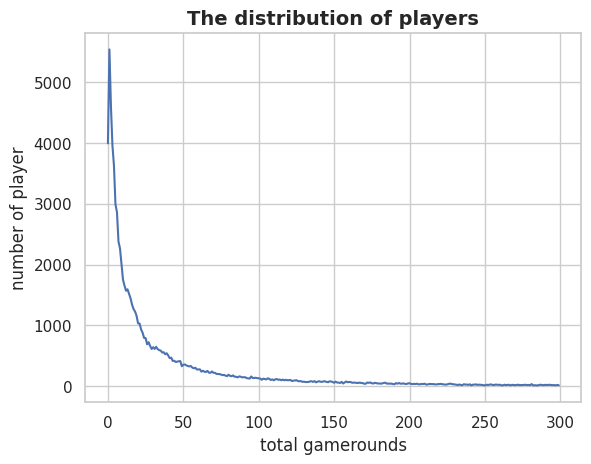

In [32]:
# The distribution of game rounds

# Counting the number of players for each number of gamerounds
plot_df = df.groupby("sum_gamerounds")["userid"].count()

# Plotting the distribution of players that played 0 to 300 game rounds
ax = plot_df.head(300).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()

In [33]:
df[df["sum_gamerounds"]== 0]["userid"].count()

3994

In [34]:
df[df["sum_gamerounds"]== 300]["userid"].count()

15

# **Findings**
- The plot above indicates that there is a significant number of players who installed the game but never actually played it, as evidenced by the spike in the distribution at 0 game rounds. This suggests that a substantial portion of the player base did not engage with the game after the initial installation.
- As the total number of gamerounds increases, the number of users who actually played the game reduces in number.
-  The game may have attracted a large initial player base, player retention and consistent engagement declined as the total gameplay hours accumulated.
- The plot reveals an inverse relationship between the total number of game rounds played and the number of users. As the total number of game rounds increases, the number of users who engaged with the game extensively decreases. This suggests that while a large number of players may have installed the game, only a smaller subset actively participated for an extended period, with the majority of users playing relatively few rounds.
- 3994 players never played the game after installing and 15 players played 300 times.

# **Analyze player retention**
- Calculating 1-day and 7-days retention for each A/B group

In [35]:

# Calculate the overall 1-day retention rate
print('The 1-Day Retention Rate: {:f}' .format(df['retention_1'].mean()))

The 1-Day Retention Rate: 0.445210


In [36]:

# Calculate the overall 7-day retention rate
print('The 7-Day Retention Rate: {:f}' .format(df['retention_7'].mean()))

The 7-Day Retention Rate: 0.186065


In [37]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-day retention ratio: {round(df_retention[0],2)}% \
      \n7-days retention ratio: {round(df_retention[1],2)}%")

1-day retention ratio: 44.52%       
7-days retention ratio: 18.61%


In [12]:
# Calculate the retention rates for each group
retention_rates = df.groupby('version')[['retention_1', 'retention_7']].mean()
print(retention_rates)

         retention_1  retention_7
version                          
gate_30     0.448188     0.190201
gate_40     0.442283     0.182000


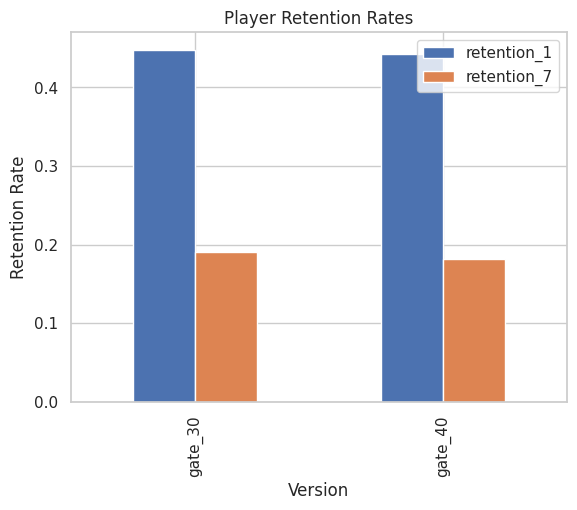

In [13]:
# Visualize the retention rate differences
import matplotlib.pyplot as plt
retention_rates.plot(kind='bar')
plt.title('Player Retention Rates')
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.show()

# **Findings**
- A little less than half of the players 44.52% come back one day after installing the game, While 18.61% percent of the players come back 7 day after installing the game.
- The higher 1-day retention is, the easier it is to retain players and build a large player base.
- There is 0.6% loss in return players randomized to the 40 round gate for 1-day. could it be significant? Maybe this product will see millions of users and that extra 0.6% could translate into some paying customers and/or ad dollars.
- There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control group when it was at level 30 (44.8%).
- A decrease in 7-day retention when the gate was moved to level 40 (18.2%) compared to the control group when it was at level 30 (19.8%)

# **Bivariate analysis**

In [38]:
df.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

In [15]:
ct_conversion_version = pd.crosstab(df['version'], df['retention_1'], normalize= 'index')
ct_conversion_version

retention_1,False,True
version,,
gate_30,0.551812,0.448188
gate_40,0.557717,0.442283


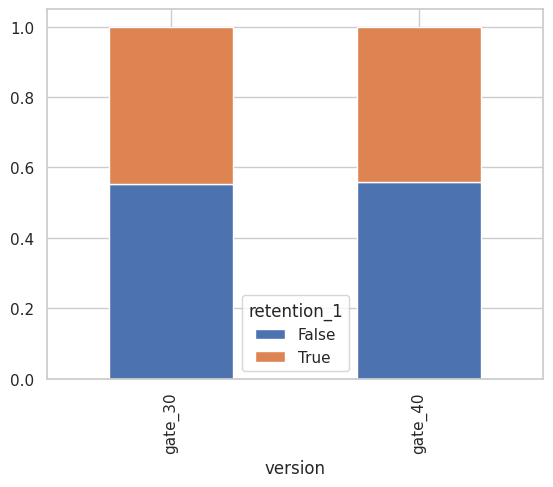

In [ ]:
ct_conversion_version.plot.bar(stacked = True);

In [16]:
ct_conversion_version = pd.crosstab(df['version'], df['retention_7'], normalize= 'index')
ct_conversion_version

retention_7,False,True
version,,
gate_30,0.809799,0.190201
gate_40,0.818000,0.182000


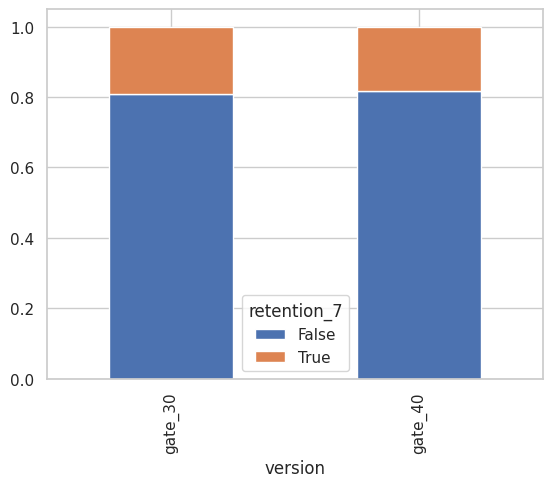

In [ ]:
ct_conversion_version.plot.bar(stacked = True);

# **Findings**
**1-day retention:**

*For gate_30:*
- 55.18% of users did not return within 1 day
- 44.82% of users did return within 1 day

*For gate_40:*

55.77% of users did not return within 1 day
44.23% of users did return within 1 day


**7-day retention:**

*For gate_30*
- 80.98% of users did not return to the game within 7 days
- 19.02% of users did return to the game within 7 days

*For gate_40:*
- 81.80% of users did not return to the game within 7 days
- 18.20% of users did return to the game within 7 days

# **Bootstrapping Means Sampling**
This is use to test the statistical confidence in our results.

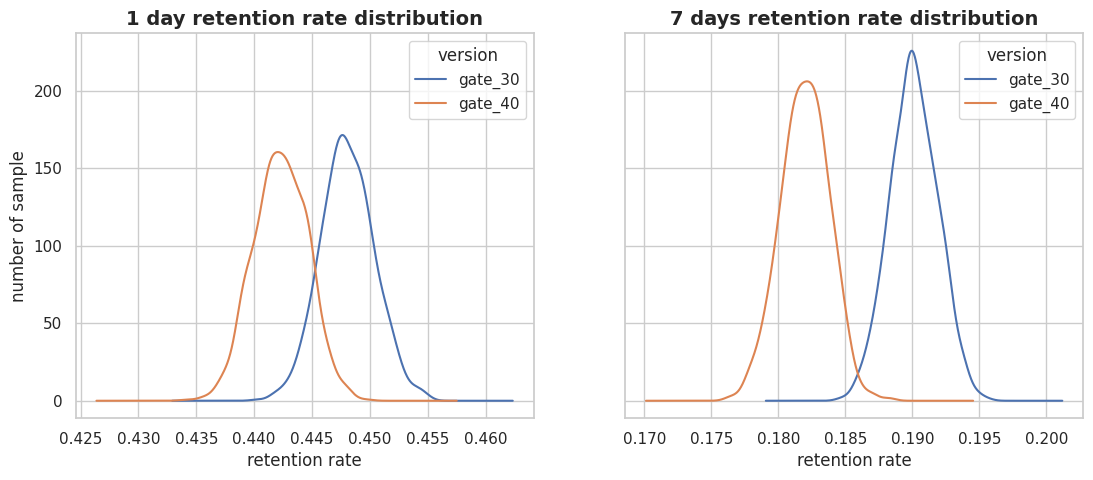

In [64]:
# Creating a list with bootstrapped means for each A/B group
boot_1d = []
boot_7d = []
for i in range(1000):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retention rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retention rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()

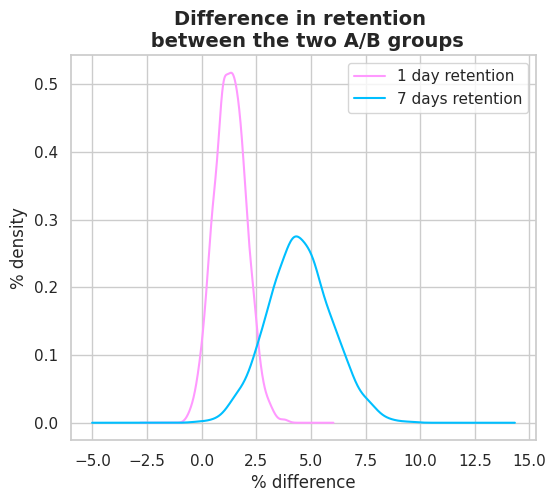

In [66]:
# Adding a column with the % difference between the two A/B groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

In [67]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Calculating the probability that 7-days retention is greater when the gate is at level 30
prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(f"The probability that 1-day retention is greater when the gate is at level 30: {round(prob_1,2)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")

The probability that 1-day retention is greater when the gate is at level 30: 97.0%       
The probability that 7-days retention is greater when the gate is at level 30: 99.9% 


# **Findings**
- From charts above, we can see that the most likely percentage difference for 1-day retention is around 1% - 2%. For 7-day retention, the most likely percentage difference is around 2% - 5%. Moreover, the majority of the distribution is above 0%, favoring a gate at level 30.
- Like with 1-day retention, we see that 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19.0%). This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate.
- The probability that 1-day retention is greater when the gate is at level 30: 97.0%       
- The probability that 7-days retention is greater when the gate is at level 30: 99.9%

# **Calculating the Average Gamerounds for each group AB**

In [42]:
# Calculate the average game rounds for each group
avg_game_rounds = df.groupby('version')['sum_gamerounds'].mean()

print("Average game rounds by version:")
print(avg_game_rounds)

Average game rounds by version:
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64


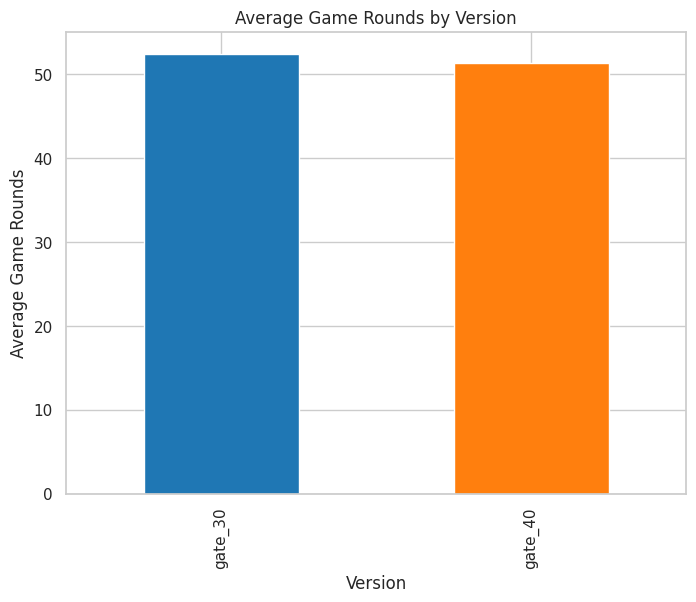

In [70]:
# Calculate the average game rounds for each group
avg_game_rounds = df.groupby('version')['sum_gamerounds'].mean()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart with custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
avg_game_rounds.plot(kind='bar', color=colors, ax=ax)

# Add labels and title
ax.set_xlabel('Version')
ax.set_ylabel('Average Game Rounds')
ax.set_title('Average Game Rounds by Version')

# Show the plot
plt.show()


# **Findings**
The bar chart above show the following:
- The average player game rounds at level 30 is 52.456264
- While the average game rounds at level 40 is 51.298776
- gate_30 had more player engagement than gate_40

# **Statistical Tests**

In [49]:
# Checking the t-test value against the players retention_1 and retention_7

# 1-day retention
alpha  = 0.05
retention_1_gate_30 = df[df['version'] == 'gate_30']['retention_1']
retention_1_gate_40 = df[df['version'] == 'gate_40']['retention_1']

t_stat_1, p_value_1 = stats.ttest_ind(retention_1_gate_30, retention_1_gate_40)

print("1-day Retention:")
print("t-statistic:", t_stat_1)
print("p-value:", p_value_1)

# 7-day retention
retention_7_gate_30 = df[df['version'] == 'gate_30']['retention_7']
retention_7_gate_40 = df[df['version'] == 'gate_40']['retention_7']

t_stat_7, p_value_7 = stats.ttest_ind(retention_7_gate_30, retention_7_gate_40)

print("\n7-day Retention:")
print("t-statistic:", t_stat_7)
print("p-value:", p_value_7)

1-day Retention:
t-statistic: 1.7840979256519656
p-value: 0.07441111525563184

7-day Retention:
t-statistic: 3.1644994996802778
p-value: 0.0015540151201088365


In [50]:
# Checking the t-test value against the players gamerounds
alpha = 0.05
gate_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
gate_40 = df[df['version'] == 'gate_40']['sum_gamerounds']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(gate_30, gate_40)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 0.8910426211362967
p-value: 0.37290868247405207


In [41]:
# Contigency Test with players game rounds
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable !='sum_gamerounds':
    # Create a contigency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['sum_gamerounds'])

    # Perform chi_squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Display the results
    print(f"\nChi_squared test for {variable} vs. sum_gamerounds:")
    print(f"Chi_squared value: {chi2}")
    print(f"p-value: {p}")

    #Check for significance
    if p < alpha:
      print(f"The difference in conversion rates across {variable} is statistically significant.")
    else:
        print(f"There is no significant difference in conversion rates across {variable}.")


Chi_squared test for userid vs. sum_gamerounds:
Chi_squared value: 84867848.99999999
p-value: 0.4711899866061489
There is no significant difference in conversion rates across userid.

Chi_squared test for version vs. sum_gamerounds:
Chi_squared value: 985.4980544212584
p-value: 0.1526113569373539
There is no significant difference in conversion rates across version.

Chi_squared test for retention_1 vs. sum_gamerounds:
Chi_squared value: 36384.00141243363
p-value: 0.0
The difference in conversion rates across retention_1 is statistically significant.

Chi_squared test for retention_7 vs. sum_gamerounds:
Chi_squared value: 35495.950116797016
p-value: 0.0
The difference in conversion rates across retention_7 is statistically significant.


In [51]:
# Contigency Test with game version
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable !='version':
    # Create a contigency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['version'])

    # Perform chi_squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Display the results
    print(f"\nChi_squared test for {variable} vs. version:")
    print(f"Chi_squared value: {chi2}")
    print(f"p-value: {p}")

    #Check for significance
    if p < alpha:
      print(f"The difference in conversion rates across {variable} is statistically significant.")
    else:
        print(f"There is no significant difference in conversion rates across {variable}.")


Chi_squared test for userid vs. version:
Chi_squared value: 90188.99999999999
p-value: 0.49843444873303394
There is no significant difference in conversion rates across userid.

Chi_squared test for sum_gamerounds vs. version:
Chi_squared value: 985.4980544212584
p-value: 0.1526113569373539
There is no significant difference in conversion rates across sum_gamerounds.

Chi_squared test for retention_1 vs. version:
Chi_squared value: 3.1591007878782262
p-value: 0.07550476210309086
There is no significant difference in conversion rates across retention_1.

Chi_squared test for retention_7 vs. version:
Chi_squared value: 9.959086799559167
p-value: 0.0016005742679058301
The difference in conversion rates across retention_7 is statistically significant.


# **Analyze player engagement**

In [54]:
# Analyze engagement metrics around the barrier levels
barrier_levels = df[df['version'] == 'gate_30']['sum_gamerounds'].unique()
for level in barrier_levels:
    level_data = df[df['sum_gamerounds'] == level]
    print(f"Engagement metrics for level {level}:")
    print(level_data[['sum_gamerounds', 'retention_1', 'retention_7']].describe())
    print()

Streaming output truncated to the last 5000 lines.
min             208.0
25%             208.0
50%             208.0
75%             208.0
max             208.0

Engagement metrics for level 307:
       sum_gamerounds
count            19.0
mean            307.0
std               0.0
min             307.0
25%             307.0
50%             307.0
75%             307.0
max             307.0

Engagement metrics for level 364:
       sum_gamerounds
count             8.0
mean            364.0
std               0.0
min             364.0
25%             364.0
50%             364.0
75%             364.0
max             364.0

Engagement metrics for level 718:
       sum_gamerounds
count             2.0
mean            718.0
std               0.0
min             718.0
25%             718.0
50%             718.0
75%             718.0
max             718.0

Engagement metrics for level 447:
       sum_gamerounds
count             6.0
mean            447.0
std               0.0
min             4

# **Conclusion**
- The bootstrap result tells us that there is strong evidence 99.9% probability that 7-day retention is higher when the gate is at level 30 than when it is at level 40.
- If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics.
- If we don’t retain our player base, it doesn’t matter how much money they spend in-game.
-  But when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it. Therefore, it makes sense that we keep gate at Level 30

# **Recommendations:**
- The introduction of gameplay barriers had a negative impact on player retention rates. Consider optimizing the placement and design of these barriers to minimize the negative effect.
- Certain barrier levels saw more significant drops in player engagement metrics, such as session duration and level completion. Further investigate these levels and explore alternative barrier implementations.
- Suggest A/B testing different barrier designs or optional barrier features that could potentially improve the player experience and increase revenue without heavily impacting retention.
- Continuously monitor player behavior and engagement data to iteratively refine the barrier implementation and other game features.

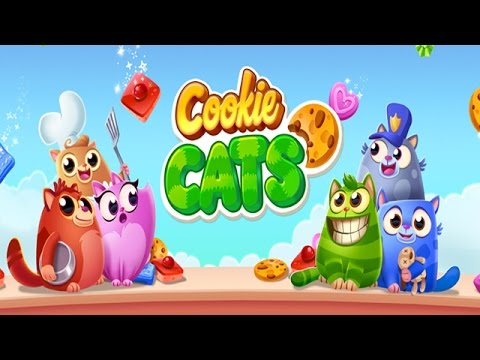

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('LLVD72FuRlw')